# Topic 28 - Microbes Classification

### EDA

First step - import required libraries and load the data

In [152]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.dpi"] =  130
df = pd.read_csv('microbes.csv')

Now we take a look at overall dataset structure

In [153]:
df.drop('Unnamed: 0', axis=1, inplace=True)
columns = list(df.columns)
print('columns list:\n', columns, end='\n\n')
print(df.head(3), end='\n\n')
print(f'number of rows: {df.shape[0]}\nnumber of columns: {df.shape[1]}', end='\n\n')

columns list:
 ['Solidity', 'Eccentricity', 'EquivDiameter', 'Extrema', 'FilledArea', 'Extent', 'Orientation', 'EulerNumber', 'BoundingBox1', 'BoundingBox2', 'BoundingBox3', 'BoundingBox4', 'ConvexHull1', 'ConvexHull2', 'ConvexHull3', 'ConvexHull4', 'MajorAxisLength', 'MinorAxisLength', 'Perimeter', 'ConvexArea', 'Centroid1', 'Centroid2', 'Area', 'raddi', 'microorganisms']

   Solidity  Eccentricity  EquivDiameter  Extrema  FilledArea  Extent  \
0     10.70          15.8           5.43     3.75       0.785    8.14   
1      5.60          18.3           4.14     6.16       0.364    3.51   
2      8.32          19.8           4.63     6.66       0.415    5.85   

   Orientation  EulerNumber  BoundingBox1  BoundingBox2  ...  ConvexHull4  \
0         2.15         22.3          2.97          10.9  ...         2.97   
1        18.60         22.5          5.41          19.2  ...         5.47   
2        21.00         22.4          5.96          10.2  ...         5.96   

   MajorAxisLength  M

We might as well take a look at the data types

In [154]:
print('data types: \n\n', df.dtypes)

data types: 

 Solidity           float64
Eccentricity       float64
EquivDiameter      float64
Extrema            float64
FilledArea         float64
Extent             float64
Orientation        float64
EulerNumber        float64
BoundingBox1       float64
BoundingBox2       float64
BoundingBox3       float64
BoundingBox4       float64
ConvexHull1        float64
ConvexHull2        float64
ConvexHull3        float64
ConvexHull4        float64
MajorAxisLength    float64
MinorAxisLength    float64
Perimeter          float64
ConvexArea         float64
Centroid1          float64
Centroid2          float64
Area               float64
raddi              float64
microorganisms      object
dtype: object


Now we investigate whether we have any missing values

In [155]:
print('number of missing values: \n\n', df.isna().sum())

number of missing values: 

 Solidity           0
Eccentricity       0
EquivDiameter      0
Extrema            0
FilledArea         0
Extent             0
Orientation        0
EulerNumber        0
BoundingBox1       0
BoundingBox2       0
BoundingBox3       0
BoundingBox4       0
ConvexHull1        0
ConvexHull2        0
ConvexHull3        0
ConvexHull4        0
MajorAxisLength    0
MinorAxisLength    0
Perimeter          0
ConvexArea         0
Centroid1          0
Centroid2          0
Area               0
raddi              0
microorganisms     0
dtype: int64


!!!Maybe we can use built-in info() instead 

In [156]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30527 entries, 0 to 30526
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Solidity         30527 non-null  float64
 1   Eccentricity     30527 non-null  float64
 2   EquivDiameter    30527 non-null  float64
 3   Extrema          30527 non-null  float64
 4   FilledArea       30527 non-null  float64
 5   Extent           30527 non-null  float64
 6   Orientation      30527 non-null  float64
 7   EulerNumber      30527 non-null  float64
 8   BoundingBox1     30527 non-null  float64
 9   BoundingBox2     30527 non-null  float64
 10  BoundingBox3     30527 non-null  float64
 11  BoundingBox4     30527 non-null  float64
 12  ConvexHull1      30527 non-null  float64
 13  ConvexHull2      30527 non-null  float64
 14  ConvexHull3      30527 non-null  float64
 15  ConvexHull4      30527 non-null  float64
 16  MajorAxisLength  30527 non-null  float64
 17  MinorAxisLen

Lets investigate data points in a more precise manner

In [157]:
print(df.describe())

           Solidity  Eccentricity  EquivDiameter       Extrema    FilledArea  \
count  30527.000000  30527.000000   30527.000000  30527.000000  30527.000000   
mean       9.677744     19.466921       3.633348     11.871832      0.420022   
std        4.063437      3.479828       2.210851      6.045135      0.875091   
min        0.000000      0.000000       0.000000      0.000000      0.000000   
25%        6.570000     17.300000       2.180000      6.790000      0.093700   
50%        9.350000     20.700000       3.380000     12.000000      0.229000   
75%       12.600000     22.200000       4.580000     17.200000      0.434500   
max       23.000000     23.000000      23.000000     23.000000     23.000000   

             Extent   Orientation   EulerNumber  BoundingBox1  BoundingBox2  \
count  30527.000000  30527.000000  30527.000000  30527.000000  30527.000000   
mean       5.840625     11.751004     22.380901     10.919027     10.399429   
std        3.250999      6.575319      0.9

We can notice, that min value for each feature is equal to 0, that can be actually missing values. Check how many 0 values we have.

In [158]:
print(df[(df == 0.0).any(axis=1)].info())

<class 'pandas.core.frame.DataFrame'>
Index: 245 entries, 38 to 30217
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Solidity         245 non-null    float64
 1   Eccentricity     245 non-null    float64
 2   EquivDiameter    245 non-null    float64
 3   Extrema          245 non-null    float64
 4   FilledArea       245 non-null    float64
 5   Extent           245 non-null    float64
 6   Orientation      245 non-null    float64
 7   EulerNumber      245 non-null    float64
 8   BoundingBox1     245 non-null    float64
 9   BoundingBox2     245 non-null    float64
 10  BoundingBox3     245 non-null    float64
 11  BoundingBox4     245 non-null    float64
 12  ConvexHull1      245 non-null    float64
 13  ConvexHull2      245 non-null    float64
 14  ConvexHull3      245 non-null    float64
 15  ConvexHull4      245 non-null    float64
 16  MajorAxisLength  245 non-null    float64
 17  MinorAxisLength  2

We can see that some of the 0 values, such that Area, Perimeter, radius cannot be equal to 0, so we decided to see all rows with 0s as rows with missing values.

Check if the disctribution is changed significantly after deleting rows with 0s.

In [159]:
df_without_zeros = df.drop(df.index[(df == 0).any(axis=1)])
class_count_non_zero = (df_without_zeros.iloc[:,-1]).value_counts(normalize=True) * 100
class_count = (df.iloc[:,-1]).value_counts(normalize=True) * 100
print('dataset WITH zero values:\n', class_count)
print('dataset WITHOUT zero values:\n', class_count_non_zero)

dataset WITH zero values:
 microorganisms
Ulothrix          24.306352
Volvox            14.151407
Aspergillus sp    12.736266
Protozoa          12.736266
Yeast             11.792839
Raizopus           8.359813
Diatom             5.955384
Pithophora         4.422315
Penicillum         3.537852
Spirogyra          2.001507
Name: proportion, dtype: float64
dataset WITHOUT zero values:
 microorganisms
Ulothrix          24.192590
Volvox            13.896044
Protozoa          12.839310
Aspergillus sp    12.766660
Yeast             11.861832
Raizopus           8.427449
Diatom             6.003566
Pithophora         4.458094
Penicillum         3.540057
Spirogyra          2.014398
Name: proportion, dtype: float64


We observe that the changes are really small and decide to delete rows with 0 values.

In [160]:
df = df.drop(df.index[(df == 0).any(axis=1)])

Now we investigate the distribution of given classes

In [186]:
unique_classes = (df.iloc[:,-1]).unique()
print(f'total: {len(unique_classes)} unique classes\n', unique_classes, end='\n\n')

class_count = round((df.iloc[:,-1]).value_counts(normalize=True) * 100, 2)
labels = ['Ulothrix','Volvox','Protozoa','Aspergillus sp','Yeast','Raizopus','Diatom','Pithophora','Penicillum','Spirogyra']

for n in range(10):
    print(class_count.iloc[n], '% -', labels[n])

total: 10 unique classes
 ['Spirogyra' 'Volvox' 'Pithophora' 'Yeast' 'Raizopus' 'Penicillum'
 'Aspergillus sp' 'Protozoa' 'Diatom' 'Ulothrix']

24.19 % - Ulothrix
13.9 % - Volvox
12.84 % - Protozoa
12.77 % - Aspergillus sp
11.86 % - Yeast
8.43 % - Raizopus
6.0 % - Diatom
4.46 % - Pithophora
3.54 % - Penicillum
2.01 % - Spirogyra


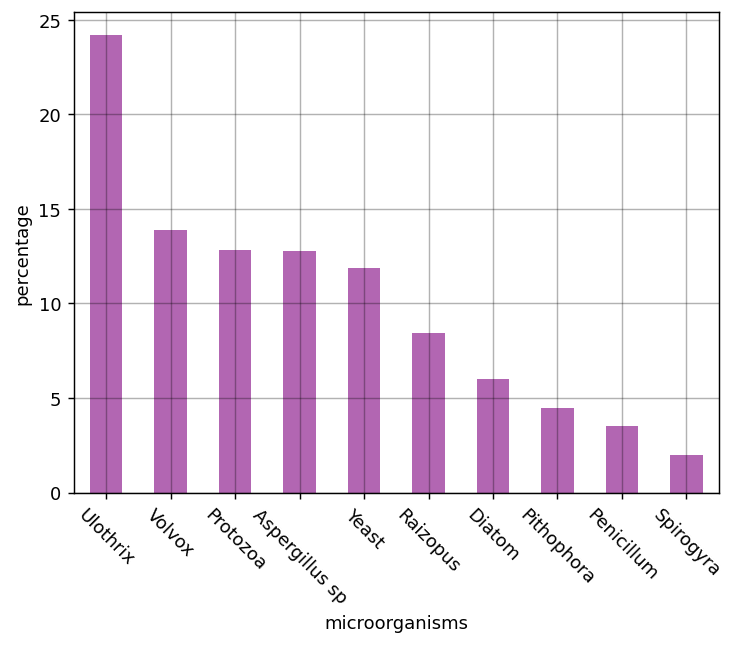

In [187]:
class_count.plot(kind='bar', color='purple', alpha=0.6)
plt.ylabel('percentage')
plt.xticks(rotation= -45)
plt.grid(color='black', alpha=0.3)
plt.show()

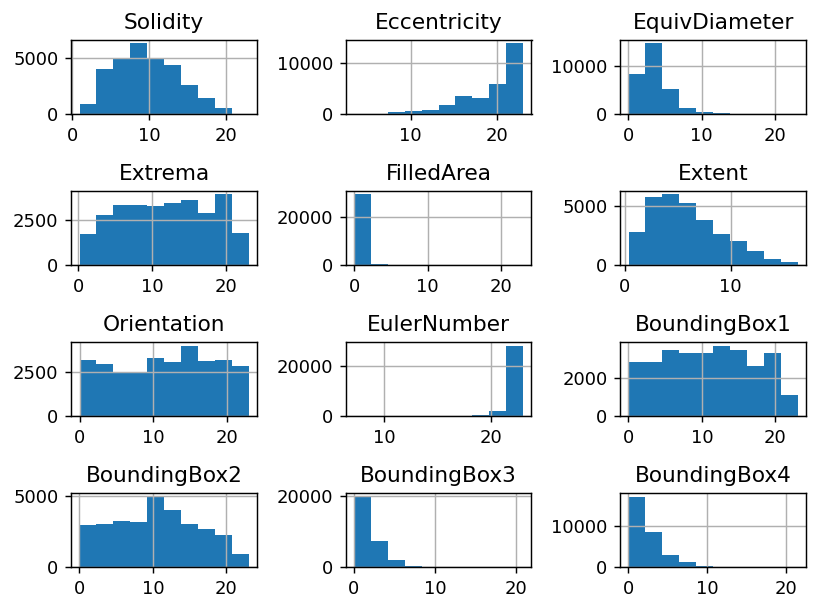

In [163]:
df.loc[:, columns[:12]].hist()
plt.tight_layout()
plt.show()

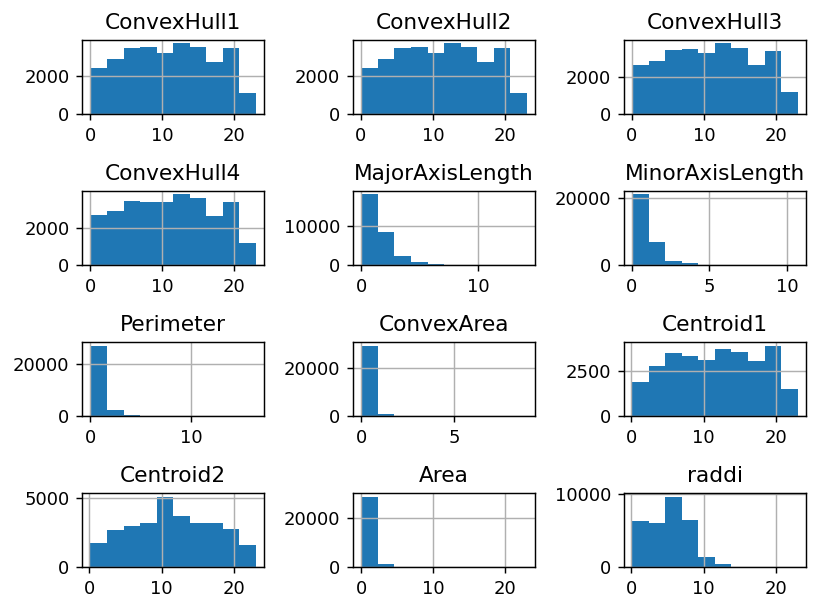

In [164]:
df.loc[:, columns[12:24]].hist()
plt.tight_layout()
plt.show()

### Boxplots & Outliers

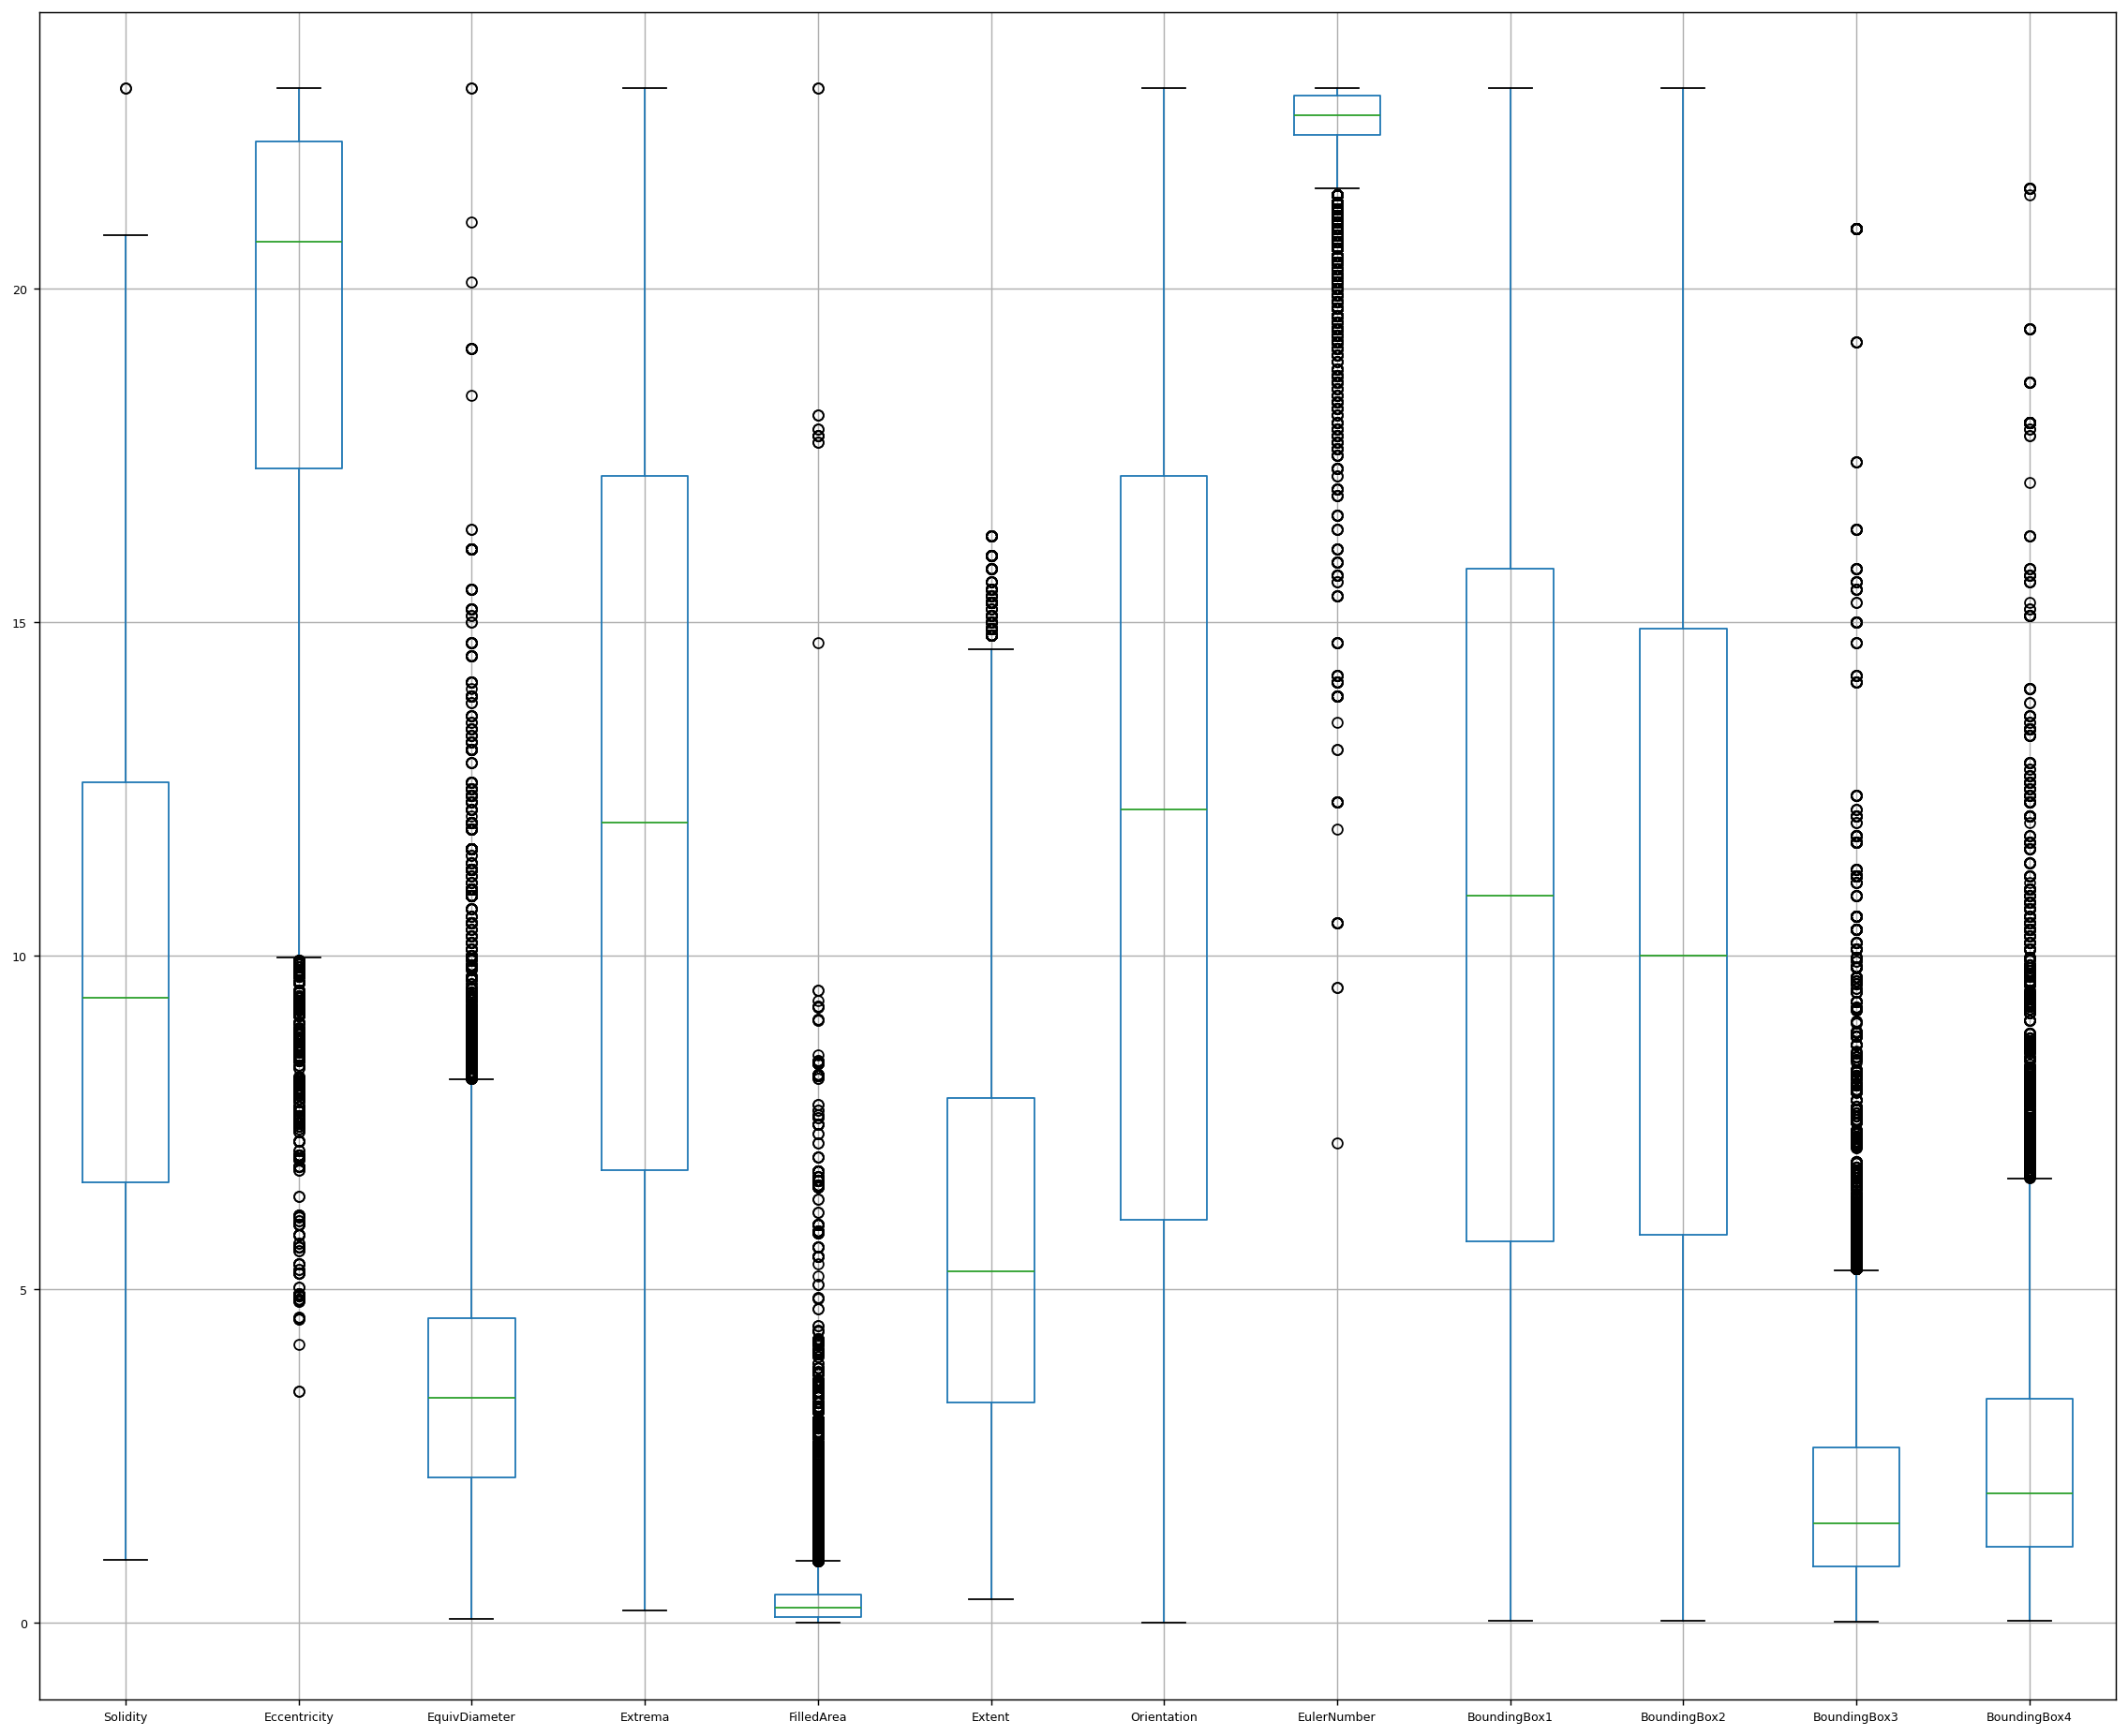

In [165]:
plt.figure(figsize=(22, 18))
df.boxplot(column=columns[:12], fontsize=7)
plt.grid(visible=True)
plt.show()

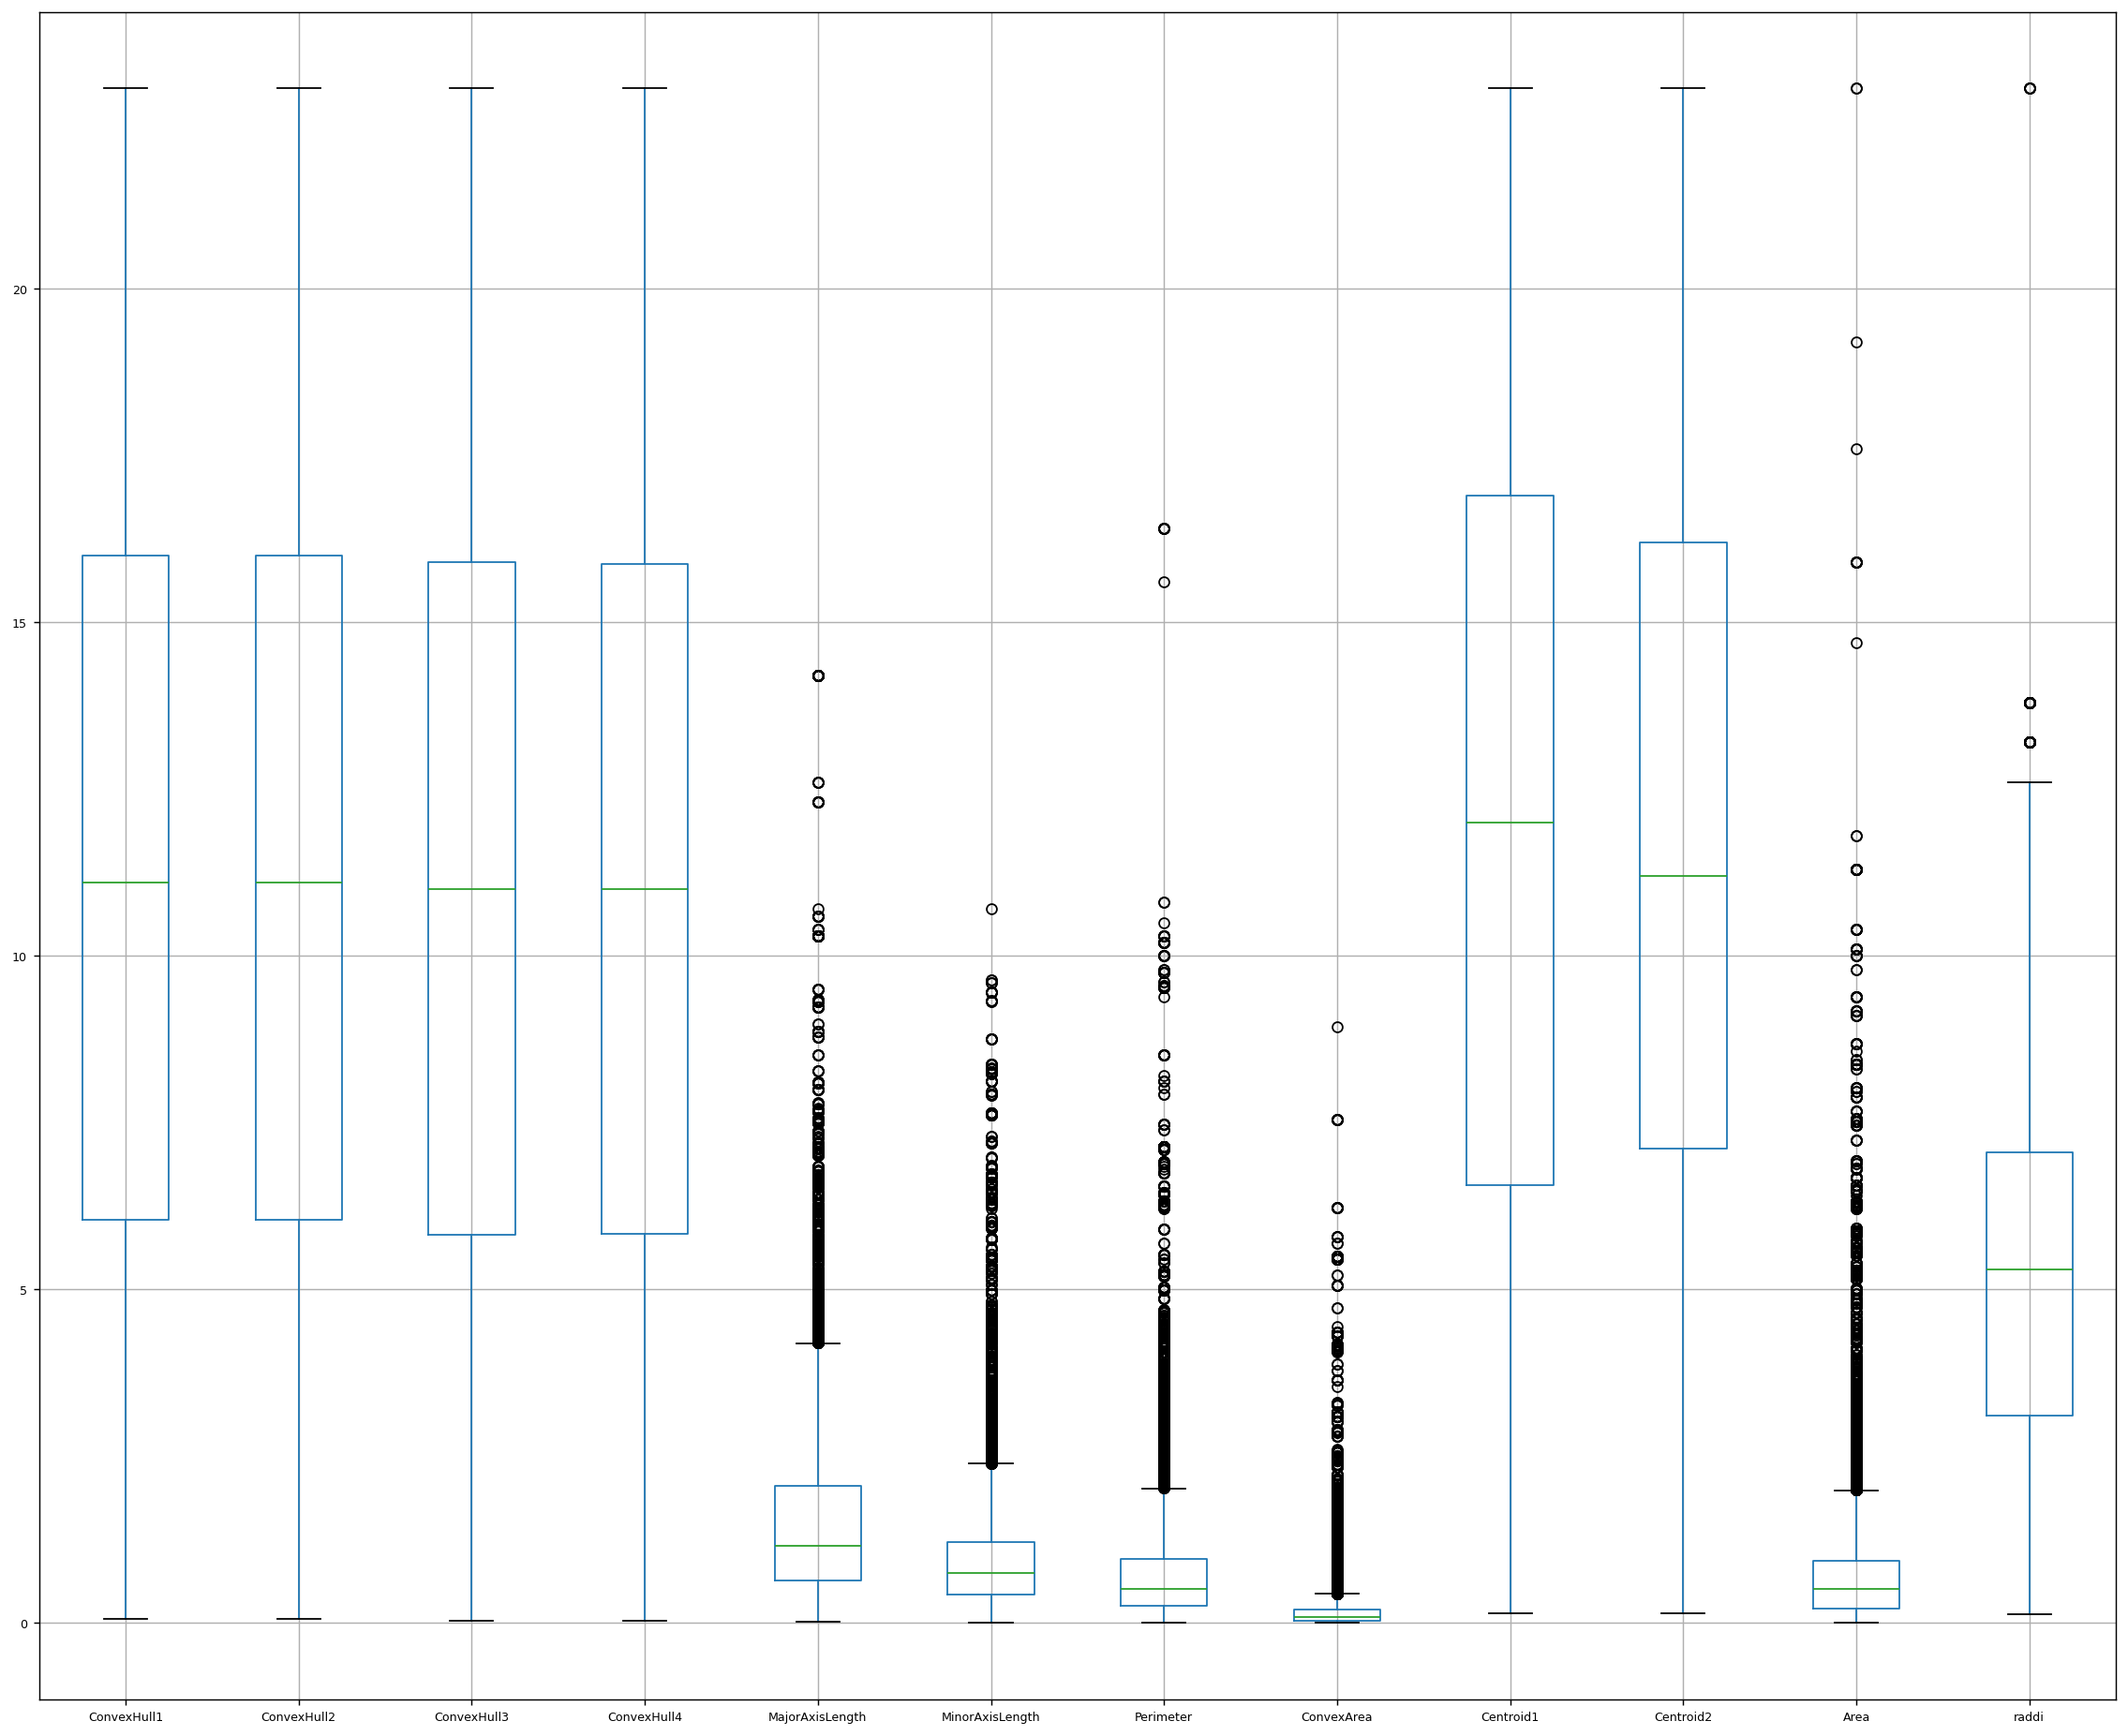

In [166]:
plt.figure(figsize=(22, 18))
df.boxplot(column=columns[12:24], fontsize=7)
plt.grid(visible=True)
plt.show()

In [167]:
df.describe()

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi
count,30282.000000,30282.000000,30282.000000,30282.000000,30282.000000,30282.000000,30282.000000,30282.000000,30282.000000,30282.000000,...,30282.000000,30282.000000,30282.000000,30282.000000,30282.000000,30282.000000,30282.000000,30282.000000,30282.000000,30282.000000
mean,9.711982,19.471294,3.613372,11.878344,0.408918,5.853272,11.774131,22.399004,10.936936,10.433183,...,11.063331,11.037045,1.553006,0.973063,0.800962,0.208654,11.741125,11.557012,0.785892,5.204489
std,4.021917,3.471259,2.154992,6.037869,0.812404,3.219089,6.572625,0.827395,6.075725,5.765978,...,6.068950,6.067579,1.407931,0.933390,1.008150,0.446959,6.023548,5.691287,1.084166,2.785417
min,0.946000,3.480000,0.066500,0.187000,0.000219,0.355000,0.000844,7.200000,0.029000,0.038700,...,0.029000,0.029000,0.015500,0.012600,0.003210,0.000040,0.144000,0.152000,0.000574,0.126000
25%,6.610000,17.300000,2.180000,6.790000,0.093800,3.300000,6.050000,22.300000,5.720000,5.820000,...,5.820000,5.830000,0.635000,0.421000,0.253000,0.035000,6.570000,7.110000,0.218000,3.110000
50%,9.370000,20.700000,3.380000,12.000000,0.229000,5.270000,12.200000,22.600000,10.900000,10.000000,...,11.000000,11.000000,1.160000,0.744500,0.515000,0.085500,12.000000,11.200000,0.513000,5.300000
75%,12.600000,22.200000,4.570000,17.200000,0.432000,7.870000,17.200000,22.900000,15.800000,14.900000,...,15.900000,15.875000,2.060000,1.210000,0.957000,0.197000,16.900000,16.200000,0.929000,7.050000
max,23.000000,23.000000,23.000000,23.000000,23.000000,16.300000,23.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,14.200000,10.700000,16.400000,8.940000,23.000000,23.000000,23.000000,23.000000


As we can see, the plots contain a lot of outliers that need to be handled
However, we should make a rule that'll help us decide whether we should keep it, change to mean/least_encountered or delete 

By intuition, we can delete all data point that are above the 3-5 * IQR from the rest of the data, however we first need to compute the number of such instances and see how much of the initial dataset in percentage they are taking
For some features we see that 75% is a very small number compared to the MAX_value of the whole feature
In addition, looking at the boxplots we can easily see an abnormaly extreme ouliers that don't fit within the range of the usual outliers

Below is the function that counts how many instances with extreme values each feature has  
It can be also used to track their indices

In [168]:
def number_of_outliers(feature):
    condition = df[feature] == 23.0              # get it from describe()
    index = df.index[condition].to_list()
    return (feature, len(index))
for ft in df.columns:
    print(number_of_outliers(ft))  

('Solidity', 2)
('Eccentricity', 272)
('EquivDiameter', 2)
('Extrema', 10)
('FilledArea', 2)
('Extent', 0)
('Orientation', 64)
('EulerNumber', 3244)
('BoundingBox1', 2)
('BoundingBox2', 6)
('BoundingBox3', 0)
('BoundingBox4', 0)
('ConvexHull1', 2)
('ConvexHull2', 2)
('ConvexHull3', 2)
('ConvexHull4', 2)
('MajorAxisLength', 0)
('MinorAxisLength', 0)
('Perimeter', 0)
('ConvexArea', 0)
('Centroid1', 2)
('Centroid2', 6)
('Area', 2)
('raddi', 4)
('microorganisms', 0)


### Unusual behavior of features

For example, the feature 'ConvexHull1' and 'ConvexHull2' are the same

Which also can be seen from the scatter matrix (separate file) as they have a VERY strong linear relation

In [169]:
print(df[['ConvexHull1', 'ConvexHull2']])

       ConvexHull1  ConvexHull2
0             3.12         3.12
1             6.08         6.08
2             5.95         5.95
3             8.93         8.93
4            10.20        10.20
...            ...          ...
30522        20.00        20.00
30523        19.00        19.00
30524        19.90        19.90
30525        20.10        20.10
30526        20.70        20.70

[30282 rows x 2 columns]


Now we plot the amount of unique values in each feature

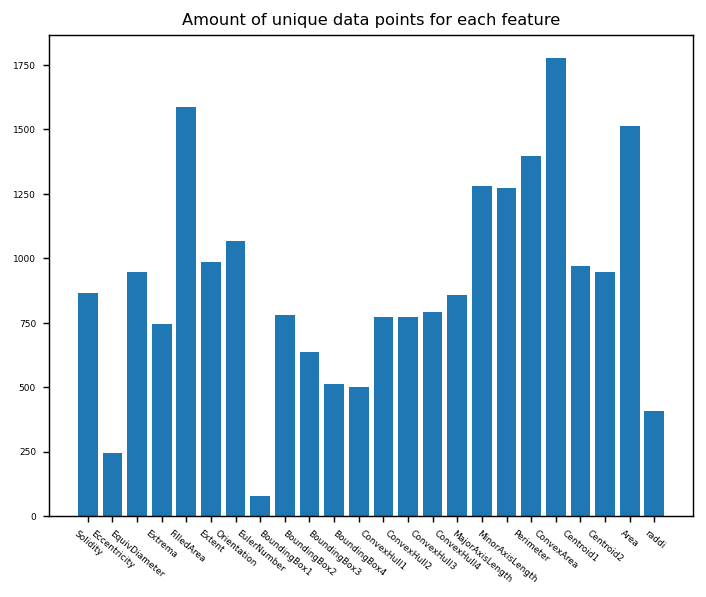

In [188]:
unique_points = []
for n in range(24):
    unique_points.append(len((df.iloc[:,n]).unique()))
plt.xticks(rotation= -40, fontsize=5)
plt.yticks(fontsize=5)
plt.bar(df.columns[:-1], unique_points)
plt.title('Amount of unique data points for each feature', fontsize=9)
plt.show()


### Experimental plots

Seperate data set depending on microorganism class (don't know if we need it)

In [171]:
Spirogyra_df = df[df['microorganisms'] == 'Spirogyra']
Volvox_df = df[df['microorganisms'] == 'Volvox']
Pithophora_df = df[df['microorganisms'] == 'Pithophora']
Yeast_df = df[df['microorganisms'] == 'Yeast']
Raizopus_df = df[df['microorganisms'] == 'Raizopus']
Penicillum_df = df[df['microorganisms'] == 'Penicillum']
Aspergillus_df = df[df['microorganisms'] == 'Aspergillus sp']
Protozoa_df = df[df['microorganisms'] == 'Protozoa']
Diatom_df = df[df['microorganisms'] == 'Diatom']
Ulothrix_df = df[df['microorganisms'] == 'Ulothrix']

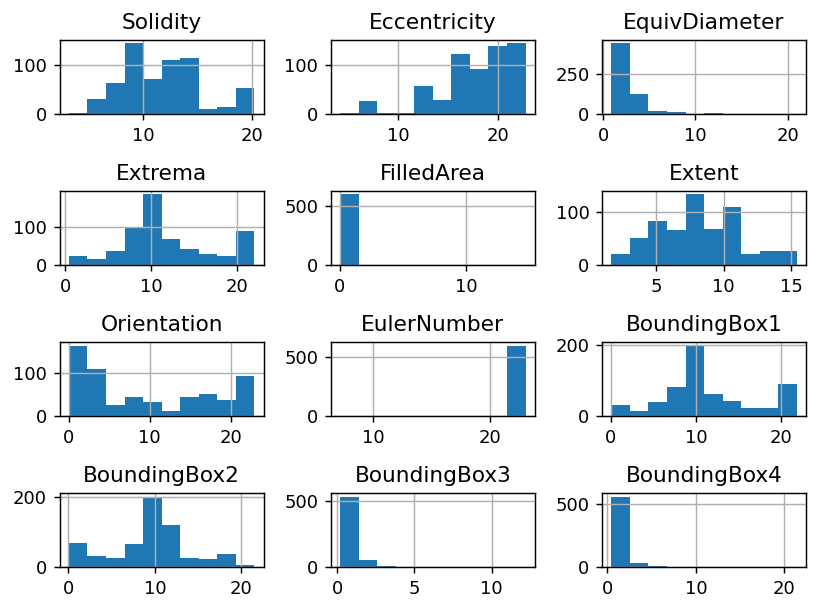

In [172]:
Spirogyra_df.loc[:, columns[:12]].hist()
plt.tight_layout()
plt.show()

There was an issue with the pairplot (generated by the following code) to the data set, because of the size of the image of the plot. So we saved it as an image.

In [173]:
'''sns.pairplot(
        data=df, 
        vars=columns[:24],
        hue='microorganisms',
        )
plt.show()'''

"sns.pairplot(\n        data=df, \n        vars=columns[:24],\n        hue='microorganisms',\n        )\nplt.show()"

(1000, 3)


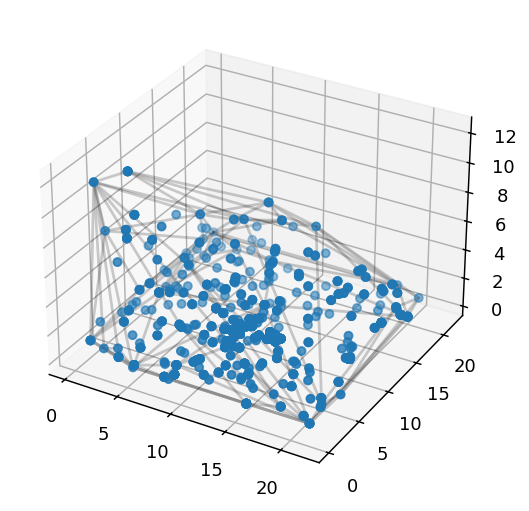

In [189]:
from scipy.spatial import ConvexHull
from sklearn.preprocessing import LabelEncoder

'''classs_encoder = LabelEncoder()
classes = classs_encoder.fit_transform(df['microorganisms'])'''

# convex hulls
#df_hull = df[['ConvexHull1', 'ConvexHull3', 'ConvexHull4']]

# bounding boxes
df_hull = df[['BoundingBox1', 'BoundingBox2', 'BoundingBox3']]

points = df_hull.to_numpy()
points_1 = points[:1000,:]
print(points_1.shape)
hull = ConvexHull(points_1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(points_1[:, 0], points_1[:, 1], points_1[:, 2], 'o')

# Plot the convex hull
for simplex in hull.simplices:
    simplex = np.append(simplex, simplex[0])  
    ax.plot(points_1[simplex, 0], points_1[simplex, 1], points_1[simplex, 2], 'k-', alpha=0.1)

plt.show()